In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from loader import get_dataloader
from train import run
from models import PointNet, PointCNN, Defense_PointNet
from attack import attacktest, attacktest2

In [2]:
b_size=16
num_class = 10 #
name = '{}'.format(num_class)
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
_, test_loader = get_dataloader(1024, b_size, name)

In [3]:
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())
print(torch.cuda.get_device_name(device))

Available devices  1
Current cuda device  0
GeForce RTX 2080 Ti


Attack

In [4]:
#load pretrained
PN = PointNet(num_class)
PN.load_state_dict(torch.load('saves/PointNet.pth'))
PN.eval()

PCNN = PointCNN(num_class)
PCNN.load_state_dict(torch.load('saves/PointCNN.pth'))
PCNN.eval()

PointCNN(
  (conv1): XConv(0, 48)
  (conv2): XConv(48, 96)
  (conv3): XConv(96, 192)
  (conv4): XConv(192, 384)
  (lin1): Linear(in_features=384, out_features=256, bias=True)
  (lin2): Linear(in_features=256, out_features=128, bias=True)
  (lin3): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
DPN = Defense_PointNet(num_class)
DPN.load_state_dict(torch.load('saves/Defense_PointNet.pth'))
DPN.eval()

Defense_PointNet(
  (features): ModuleList(
    (0): PointConv(local_nn=Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
    ), global_nn=None)
    (1): PointConv(local_nn=Sequential(
      (0): Linear(in_features=67, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
    ), global_nn=None)
    (2): PointConv(local_nn=Sequential(
      (0): Linear(in_features=131, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
    ), global_nn=None)
  )
  (classifier): ModuleList(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
  (discriminator): ModuleList(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): Linear(in_fe

1) PointNet -> PointNet

Epsilon: 0	Test Accuracy = 839 / 908 = 0.9240088105726872
Epsilon: 0.05	Test Accuracy = 762 / 908 = 0.8392070484581498
Epsilon: 0.1	Test Accuracy = 650 / 908 = 0.7158590308370044
Epsilon: 0.15	Test Accuracy = 533 / 908 = 0.5870044052863436
Epsilon: 0.2	Test Accuracy = 518 / 908 = 0.5704845814977973
Epsilon: 0.25	Test Accuracy = 451 / 908 = 0.4966960352422907
Epsilon: 0.3	Test Accuracy = 343 / 908 = 0.3777533039647577


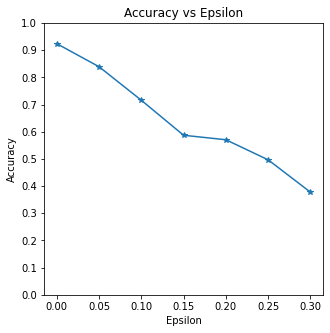

In [10]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, PN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

2) PointNet -> PointCNN

Epsilon: 0	Test Accuracy = 844 / 908 = 0.9295154185022027
Epsilon: 0.05	Test Accuracy = 810 / 908 = 0.8920704845814978
Epsilon: 0.1	Test Accuracy = 745 / 908 = 0.8204845814977973
Epsilon: 0.15	Test Accuracy = 636 / 908 = 0.7004405286343612
Epsilon: 0.2	Test Accuracy = 554 / 908 = 0.6101321585903083
Epsilon: 0.25	Test Accuracy = 440 / 908 = 0.4845814977973568
Epsilon: 0.3	Test Accuracy = 364 / 908 = 0.4008810572687225


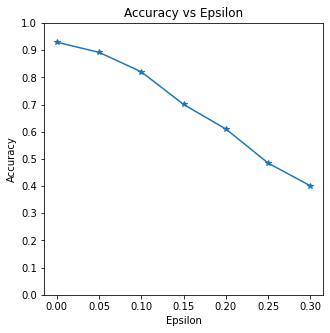

In [6]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, PCNN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

3) PointCNN -> PointCNN

Epsilon: 0	Test Accuracy = 852 / 908 = 0.9383259911894273
Epsilon: 0.05	Test Accuracy = 797 / 908 = 0.8777533039647577
Epsilon: 0.1	Test Accuracy = 737 / 908 = 0.8116740088105727
Epsilon: 0.15	Test Accuracy = 640 / 908 = 0.7048458149779736
Epsilon: 0.2	Test Accuracy = 520 / 908 = 0.5726872246696035
Epsilon: 0.25	Test Accuracy = 417 / 908 = 0.4592511013215859
Epsilon: 0.3	Test Accuracy = 351 / 908 = 0.3865638766519824


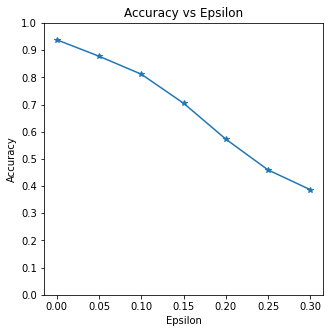

In [9]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, PCNN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

4) PointCNN -> PointNet

Epsilon: 0	Test Accuracy = 842 / 908 = 0.9273127753303965
Epsilon: 0.05	Test Accuracy = 797 / 908 = 0.8777533039647577
Epsilon: 0.1	Test Accuracy = 697 / 908 = 0.7676211453744494
Epsilon: 0.15	Test Accuracy = 623 / 908 = 0.6861233480176211
Epsilon: 0.2	Test Accuracy = 651 / 908 = 0.7169603524229075
Epsilon: 0.25	Test Accuracy = 541 / 908 = 0.5958149779735683
Epsilon: 0.3	Test Accuracy = 429 / 908 = 0.4724669603524229


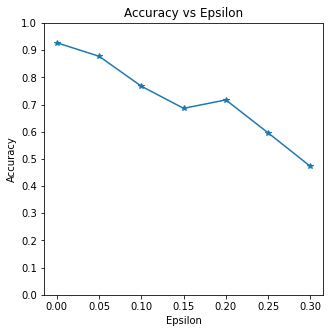

In [8]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, PN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

5) PointNet -> Defense PN

Epsilon: 0	Test Accuracy = 840 / 908 = 0.9251101321585903
Epsilon: 0.05	Test Accuracy = 829 / 908 = 0.9129955947136564
Epsilon: 0.1	Test Accuracy = 820 / 908 = 0.9030837004405287
Epsilon: 0.15	Test Accuracy = 781 / 908 = 0.8601321585903083
Epsilon: 0.2	Test Accuracy = 739 / 908 = 0.8138766519823789
Epsilon: 0.25	Test Accuracy = 586 / 908 = 0.6453744493392071
Epsilon: 0.3	Test Accuracy = 438 / 908 = 0.48237885462555063


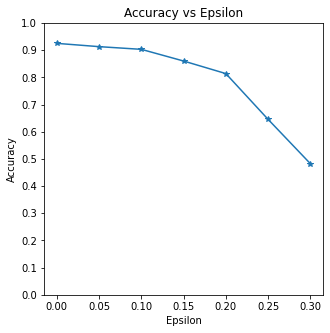

In [6]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PN, DPN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

6)Defense PN -> Defense PN (from classification backward)

Epsilon: 0	Test Accuracy = 842 / 908 = 0.9273127753303965
Epsilon: 0.05	Test Accuracy = 809 / 908 = 0.8909691629955947
Epsilon: 0.1	Test Accuracy = 814 / 908 = 0.8964757709251101
Epsilon: 0.15	Test Accuracy = 781 / 908 = 0.8601321585903083
Epsilon: 0.2	Test Accuracy = 686 / 908 = 0.7555066079295154
Epsilon: 0.25	Test Accuracy = 596 / 908 = 0.6563876651982379
Epsilon: 0.3	Test Accuracy = 446 / 908 = 0.4911894273127753


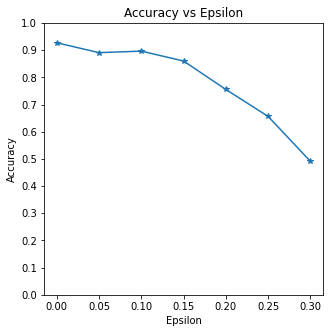

In [7]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(DPN, DPN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

7)Point CNN-> Defense PN (from classification backward)

Epsilon: 0	Test Accuracy = 836 / 908 = 0.920704845814978
Epsilon: 0.05	Test Accuracy = 833 / 908 = 0.9174008810572687
Epsilon: 0.1	Test Accuracy = 812 / 908 = 0.8942731277533039
Epsilon: 0.15	Test Accuracy = 772 / 908 = 0.8502202643171806
Epsilon: 0.2	Test Accuracy = 699 / 908 = 0.7698237885462555
Epsilon: 0.25	Test Accuracy = 574 / 908 = 0.6321585903083701
Epsilon: 0.3	Test Accuracy = 467 / 908 = 0.51431718061674


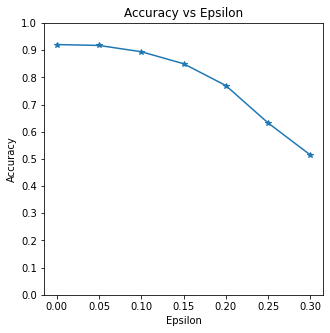

In [8]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]


# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest(PCNN, DPN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

8)discriminator attack -> defense PN

Epsilon: 0	Test Accuracy = 836 / 908 = 0.920704845814978
Epsilon: 0.05	Test Accuracy = 822 / 908 = 0.9052863436123348
Epsilon: 0.1	Test Accuracy = 820 / 908 = 0.9030837004405287
Epsilon: 0.15	Test Accuracy = 796 / 908 = 0.8766519823788547
Epsilon: 0.2	Test Accuracy = 739 / 908 = 0.8138766519823789
Epsilon: 0.25	Test Accuracy = 616 / 908 = 0.6784140969162996
Epsilon: 0.3	Test Accuracy = 446 / 908 = 0.4911894273127753


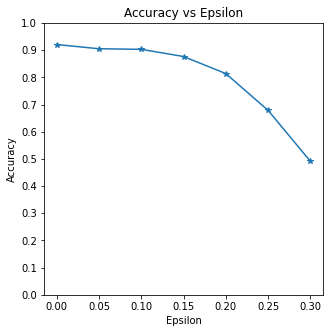

In [6]:
accuracies = []
examples = []
epsilons = [0, .05, .1, .15, .2, .25, .3]

# Run test for each epsilon
for eps in epsilons:
    acc, ex = attacktest2(DPN, DPN, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)
    
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()